# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform, norm, expon
import pandas as pd

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [1]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.06608877 2.57859545 2.72620499 2.89483207 2.9918112  2.46020641
 2.55251221 2.22277501 2.43117355 2.96450578]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [7]:
# your code here
def unif_random(bottom, ceiling, count):
    return uniform.rvs(np.linspace(bottom,ceiling,count))

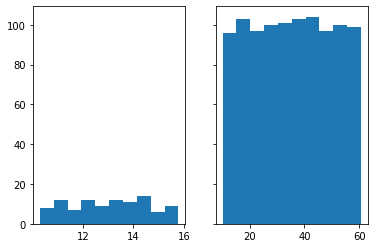

In [28]:
fig, axs = plt.subplots(1,2, figsize=(6,4), sharey=True)
callers = [[10,15,100],[10,60,1000]]
for c in callers:
    axs[callers.index(c)].hist(unif_random(*c), bins=10)

How are the two distributions different?

#### Answer

Both have different ranges of possible values: in both, values cannot be smaller than 10, but while in the first one values also cannot be greater than 16; in the second values can be greater than 16, but not than 61. The first distribution has also less values than the second one too.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

In [41]:
# your code here
def norm_random(avg, std, values):
    return np.random.normal(avg,std,values)

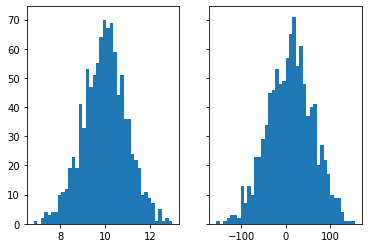

In [63]:
fig, axs = plt.subplots(1,2, figsize=(6,4), sharey=True)
callers = [[10,1,1000], [10,50,1000]]
for c in callers:
    axs[callers.index(c)].hist(norm_random(*c), bins=40)

How are the two distributions different?

#### Answer

Both distributions have the same shape and number of values, and the average of those is the same, but a different standard deviation makes its range of values greater in the second case, where they can be either smaller than -100 or greater than 100. On the first case, the values are not smaller than 6 nor greater than 14.

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise.

First import vehicles.csv. Then plot the histograms for the following variables:

In [66]:
vehicles = pd.read_csv('vehicles.csv')
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


1. Fuel Barrels/Year

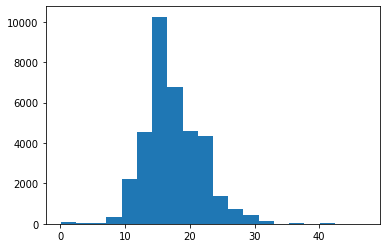

In [157]:
# your code here
plt.hist(vehicles['Fuel Barrels/Year'], bins=20);

2. CO2 Emission Grams/Mile 

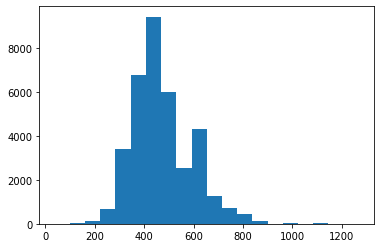

In [158]:
# your code here
plt.hist(vehicles['CO2 Emission Grams/Mile'], bins=20);

3. Combined MPG

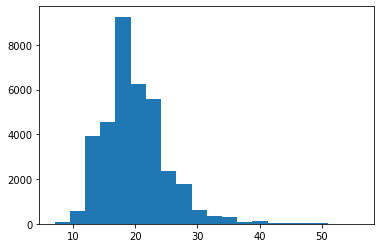

In [159]:
# your code here
plt.hist(vehicles['Combined MPG'], bins=20);

Which one(s) of the variables are nearly normally distributed? How do you know?

#### Answer

Both Fuel Barrels/Year and Combined MPG are the closest of being normally distributed, as both increase up to a certain point and then decrease. 

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [180]:
# your code here
def exp_random(scale):
    return np.random.exponential(scale, 800)

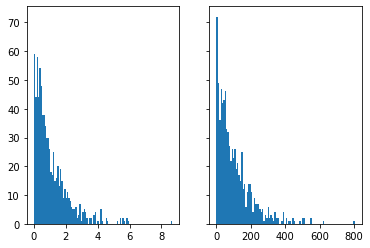

In [182]:
fig, axs = plt.subplots(1,2, figsize=(6,4), sharey=True)
callers = [1, 100]
for c in callers:
    axs[callers.index(c)].hist(exp_random(c), bins=100)

How are the two distributions different?

#### Answer

The difference is on its scale: while the left one takes a size of 1, the right one has a size 100 times greater.

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [198]:
# your answer here
# Hint: This is same as saying P(x<15)
time_bank = expon(scale=10)
round(time_bank.cdf(15), 3)

0.777

What is the probability that the customer will spend more than 15 minutes

In [200]:
# your answer here
round(1 - time_bank.cdf(15), 3)

0.223